In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# pix = img
# plt.axis('off')
# plt.imshow(pix)

In [ ]:
import os
import cv2
import torch.nn.functional as F
import numpy as np
import torch
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/BasicofDeeplearning/pic/'
def makedata(filepath):

  imgfilname_list = os.listdir(filepath)
  final_list=[]
  t=0
  for i in range(len(imgfilname_list)):
    img = Image.open(filepath+imgfilname_list[i])
    h, w, c = torch.from_numpy(np.array(img)).shape
    img, new_h, new_w = resizing(img, h, w, size=208)
    img = padding(img, new_w, new_h)
    final_list.append(img)
  
    if t%100==0 and t!=0:
      print(f'{t}th pic progressed!')
    t=t+1
  return final_list


def resizing(img, h, w, size):

  if h > w : #세로가 더 길때
    new_h=int(size)
    new_w=int(w*(size/h))

  elif h<=w: # 가로가 더 길때
    new_h=int(h*(size/w))
    new_w=int(size)

  image = img.resize((new_w, new_h))

  return image, new_h, new_w, 

def padding(img, new_w, new_h):
    
  dim_diff = np.abs(new_h - new_w)
  # (upper / left) padding and (lower / right) padding
  pad1, pad2 = dim_diff // 2, dim_diff - dim_diff // 2
  # Determine padding
  pad = (0, 0, 0,0,pad1, pad2) if new_h <= new_w else (0, 0, pad1, pad2, 0, 0)
  # Add padding
  img = F.pad(torch.from_numpy(np.array(img)), pad, "constant", value=0)
  
  return img



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("progressing...")
img = makedata(file_path)

progressing...
100th pic progressed!
200th pic progressed!
300th pic progressed!
400th pic progressed!


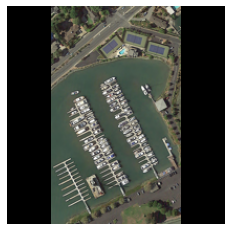

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
pix = img[25].numpy()
plt.axis('off')
plt.imshow(pix)

In [ ]:
len(make_grid(img[0:3]))
images=[]
for i in img:
  if i is 11: break
  images.append(make_grid(img[i])



208

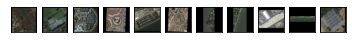

In [ ]:
#미구현

from torchvision.utils import make_grid

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
       
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

images=[]
for i,data in enumerate(img):
  if i is 11: break
  images.append(make_grid(data,scale_each=True,nrow=8 ))


show(images)

In [ ]:
a=torch.from_numpy(np.array(img[0])).unsqueeze(0)
print(len(a))
plt.imshow()

1


TypeError: ignored

In [ ]:
import json
from pprint import pprint 

with open('/content/drive/MyDrive/BasicofDeeplearning/annotations.json', 'r') as f:

    json_data = json.load(f)

#print(json.dumps(json_data) )
pprint(json_data)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
                                 'ellipse': [[392.5077209472656,
                                              923.3260498046875],
                                             [15.149859428405762,
                                              19.861705780029297],
                                             19.262540817260742],
                                 'ellipse_org': [[398.014, 915.363],
                                                 [386.04, 919.918],
                                                 [387.967, 931.308],
                                                 [393.458, 933.412],
                                                 [399.124, 927.804],
                                                 [393.458, 914.545]]},
                                {'bbox': {'xmax': 399.0,
                                          'xmin': 387.0,
                                          'ymax': 957.0,
                                          'ymin'

KeyboardInterrupt: ignored

In [ ]:
from torch.utils.data import DataLoader

 dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=n_cpu,
        pin_memory=True,
        collate_fn=dataset.collate_fn,
        worker_init_fn=worker_seed_set)
    return dataloader